In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore') # no more 'useless' red warnings 


In [2]:
mca = pd.read_csv('../lab-customer-analysis-round-3/files_for_lab/csv_files/customer_analysis_round_2.csv')
mca

,Unnamed: 0,unnamed,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,No_Type,2
1,1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,No_Type,1
2,2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,No_Type,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,No_Type,2
10908,10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


In [3]:

mca=mca.drop('Unnamed: 0', axis=1)


In [4]:
pd.set_option('display.max_columns', None) # displays all columns in dfs

In [5]:
mca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   unnamed                        10910 non-null  int64  
 1   customer                       10910 non-null  object 
 2   state                          10910 non-null  object 
 3   customer_lifetime_value        10910 non-null  float64
 4   response                       10910 non-null  object 
 5   coverage                       10910 non-null  object 
 6   education                      10910 non-null  object 
 7   effective_to_date              10910 non-null  object 
 8   employmentstatus               10910 non-null  object 
 9   gender                         10910 non-null  object 
 10  income                         10910 non-null  int64  
 11  location_code                  10910 non-null  object 
 12  marital_status                 10910 non-null 

In [6]:
mca.isna().sum()

unnamed                          0
customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
vehicle_type                     0
month                            0
dtype: int64

In [7]:
mca.describe().T

,count,mean,std,min,25%,50%,75%,max
unnamed,10910.0,5454.500000,3149.590053,0.000000,2727.250000,5454.500000,8181.750000,10909.000000
customer_lifetime_value,10910.0,8018.241094,6885.081434,1898.007675,4014.453113,5771.147235,8992.779137,83325.381190
income,10910.0,37536.284785,30359.195670,0.000000,0.000000,33813.500000,62250.750000,99981.000000
monthly_premium_auto,10910.0,93.196059,34.442532,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,10910.0,15.149071,9.783520,0.000000,7.000000,15.000000,23.000000,35.000000
months_since_policy_inception,10910.0,48.091934,27.940675,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,10910.0,0.384256,0.885589,0.000000,0.000000,0.000000,0.384256,5.000000
number_of_policies,10910.0,2.979193,2.399359,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,10910.0,434.888330,292.180556,0.099007,271.082527,382.564630,547.200000,2893.239678
month,10910.0,1.466728,0.498915,1.000000,1.000000,1.000000,2.000000,2.000000


In [8]:
summary = mca.describe().T
summary['iqr'] = summary['75%']-summary['25%'] #interquantile range = iqr
summary = summary.apply(round) # lambda x: round(x, 2)
summary

,count,mean,std,min,25%,50%,75%,max,iqr
unnamed,10910.0,5454.0,3150.0,0.0,2727.0,5454.0,8182.0,10909.0,5454.0
customer_lifetime_value,10910.0,8018.0,6885.0,1898.0,4014.0,5771.0,8993.0,83325.0,4978.0
income,10910.0,37536.0,30359.0,0.0,0.0,33814.0,62251.0,99981.0,62251.0
monthly_premium_auto,10910.0,93.0,34.0,61.0,68.0,83.0,109.0,298.0,41.0
months_since_last_claim,10910.0,15.0,10.0,0.0,7.0,15.0,23.0,35.0,16.0
months_since_policy_inception,10910.0,48.0,28.0,0.0,24.0,48.0,71.0,99.0,47.0
number_of_open_complaints,10910.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0
number_of_policies,10910.0,3.0,2.0,1.0,1.0,2.0,4.0,9.0,3.0
total_claim_amount,10910.0,435.0,292.0,0.0,271.0,383.0,547.0,2893.0,276.0
month,10910.0,1.0,0.0,1.0,1.0,1.0,2.0,2.0,1.0


In [9]:
mca['response']

0             No
1             No
2             No
3            Yes
4             No
          ...   
10905         No
10906         No
10907         No
10908         No
10909    No_data
Name: response, Length: 10910, dtype: object

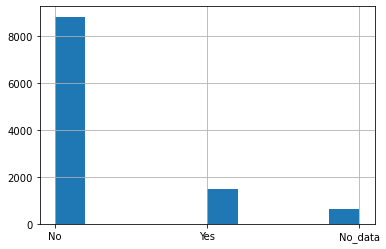

In [10]:
mca['response'].hist()
plt.show()

<AxesSubplot:xlabel='response', ylabel='count'>

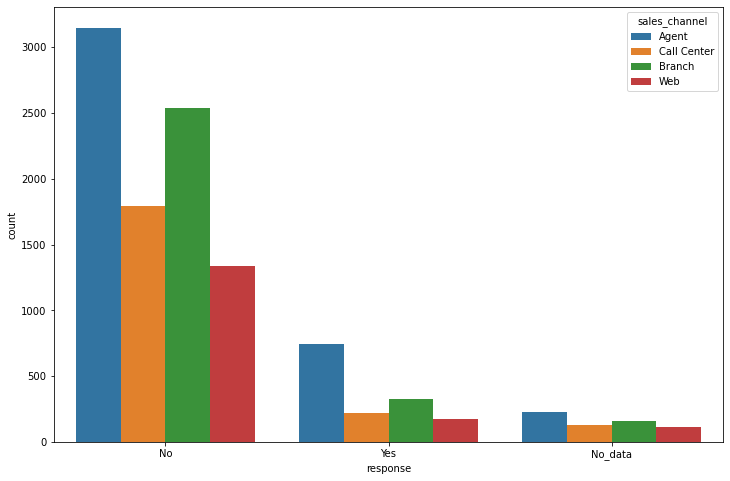

In [11]:
plt.figure(figsize=(12,8))
sns.countplot('response', hue='sales_channel', data=mca)

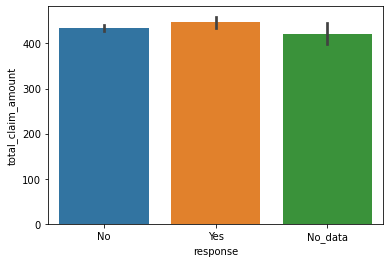

In [12]:
ax = sns.barplot(x="response", y="total_claim_amount", data=mca)

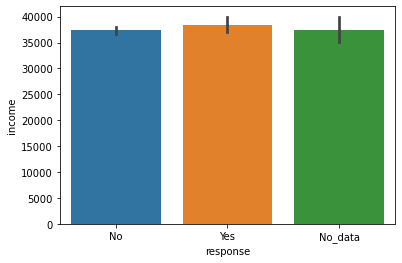

In [13]:
ax = sns.barplot(x="response", y="income", data=mca)

In [14]:
mca.to_csv('customer_analysis_round_3.csv')